In [1]:
# Remember to use GPU on this!
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Data loading similar to the CNN code
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Build the model, which is an LSTM this time
# Its long distance because we cant tell what the image is of unless we look at the image as a whole
# We treat the input data as shape N x T x D, where T = D = 28
# It's like a scanner, where the LSTM scans each row of the image and uses that along with previous rows to get the next row
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i) # number of units (128) = number of feature maps on last Conv2D for CNN
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # CNN loss (RNN is 'mse')
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 6ms/step - loss: 0.3253 - accuracy: 0.8963 - val_loss: 0.1121 - val_accuracy: 0.9656
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1019 - accuracy: 0.9688 - val_loss: 0.0740 - val_accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0716 - accuracy: 0.9778 - val_loss: 0.0736 - val_accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.0650 - val_accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0476 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.0543 - val_accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0432 - val_accura

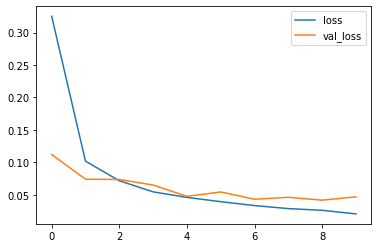

In [5]:
# Notice how our accuracy is .99, whic is great, espceially for just 10 epochs and considering an LSTM has a limit of around 30 previous steps
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

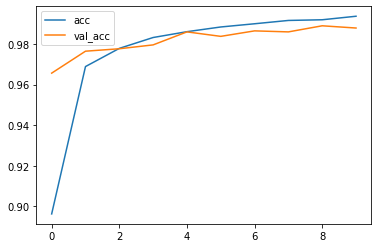

In [6]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1127    1    0    0    2    3    1    1    0]
 [   3    0 1024    0    1    0    0    1    3    0]
 [   0    0    0 1005    0    3    0    0    1    1]
 [   0    0    2    0  960    0    5    3    1   11]
 [   1    1    0    8    0  879    1    0    2    0]
 [   5    2    0    0    0    4  946    0    1    0]
 [   1    5   10    3    0    0    0 1007    1    1]
 [   4    0    3    2    1    1    1    2  958    2]
 [   0    0    0    2    6    1    0    3    4  993]]


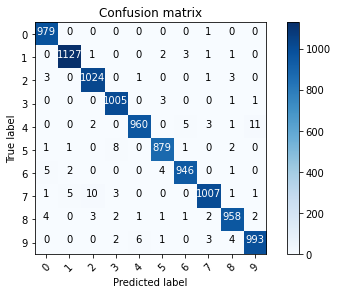

In [7]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  '''
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting "normalize=True
  '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=l)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 4 Predicted: 7')

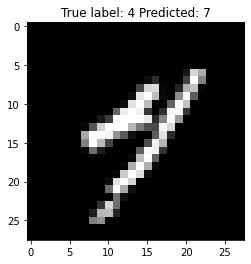

In [8]:
# Show misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))